# Utilisation des mots ne figurant pas dans le dictionnaire français

## Paquets utilisés
On aura besoin des librairie externe: 
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [wordcloud](https://amueller.github.io/word_cloud/)

In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
from wordcloud import WordCloud
from typing import List

## Ouverture des fichiers contenant les données a utiliser

In [2]:
songs: pd.DataFrame
french: pd.Series
english: pd.Series

songs = pd.read_json("./datas/songs.json")

with open("./datas/french.txt", "r", encoding="utf8") as file:
        french = pd.Series(file.read().lower().splitlines())
        file.close()

# Generated with http://app.aspell.net/create
with open("./datas/english.txt", "r", encoding="utf8") as file:
        english = pd.Series(file.read().lower().splitlines())
        file.close()

## Séléction et manipulation des données afin de pouvoir les utiliser

In [3]:
# Group all the words of all the songs in a single pd.Serie
words: pd.Series = songs["lyrics_keywords"].apply(lambda x: x.split(" ")).explode()

# Number of every differents words in all lyrics
all_words_count=len(words)

# Count all the words in this array
occurences: pd.Series = words.value_counts()

# Create a Dataframe that contains the number of occurence
# and if the word is inside the french dictionary
data = {
    "count": occurences,
    "is_french": occurences.index.isin(french),
    "is_english": occurences.index.isin(english)
}

description = pd.DataFrame(
    data=data,
    columns=["count", "is_french", "is_english"],
    index=occurences.index
)

#Select all the words and their count
words_count = pd.Series(description["count"], description.index)

# Select only the words that aren't french
not_french = description[description["is_french"] == False]
not_french = not_french[not_french["is_english"] == False]

frequency = pd.Series(not_french["count"], index=not_french.index)

with open("./datas/not_french.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

not_french

,count,is_french,is_english
p'tit,251,False,False
biff,246,False,False
wesh,164,False,False
igo,138,False,False
yah,131,False,False
...,...,...,...
anti-tapettes,1,False,False
hit-maker,1,False,False
incante,1,False,False
r'frain,1,False,False


Ceci est la liste des mots de figurant pas dans le dictionnaire france avec leurs occurences (globale, parmis toutes les musiques)

## Recherche d'un mot particulier et pourcentage

In [4]:
# Textbox creation
word_textbox = ipw.Text(value="", placeholder="Search word", description="Word to count:", disabled=False)

# Function called when the button is clicked
def textbox_changed(word: str):
    word_searched = word.lower().strip()

    if word_searched in words_count:
        #number of times used
        print(f"The word \"{word_searched}\" is used {words_count[word_searched]} times in all the lyrics\n")
        #percentage of use
        percentage_used_word = round(words_count[word_searched] / all_words_count * 100, 2)
        print(f"Percentage of use: {percentage_used_word}%")
    else:
        print(f"The word \"{word_searched}\" is not in any lyrics")

# Button interaction
ipw.interact_manual(textbox_changed, word=word_textbox.value)

interactive(children=(Text(value='', description='word'), Button(description='Run Interact', style=ButtonStyle…

<function __main__.textbox_changed(word: str)>

## WordCloud, plus le mot est grand, plus il est utilisé

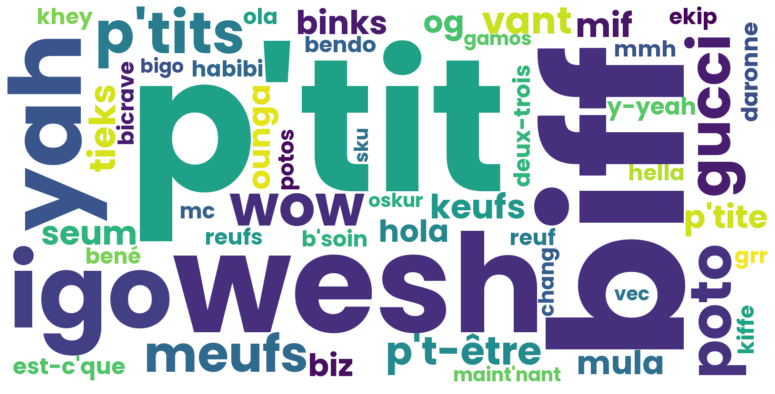

In [5]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogramme des mots

<AxesSubplot:>

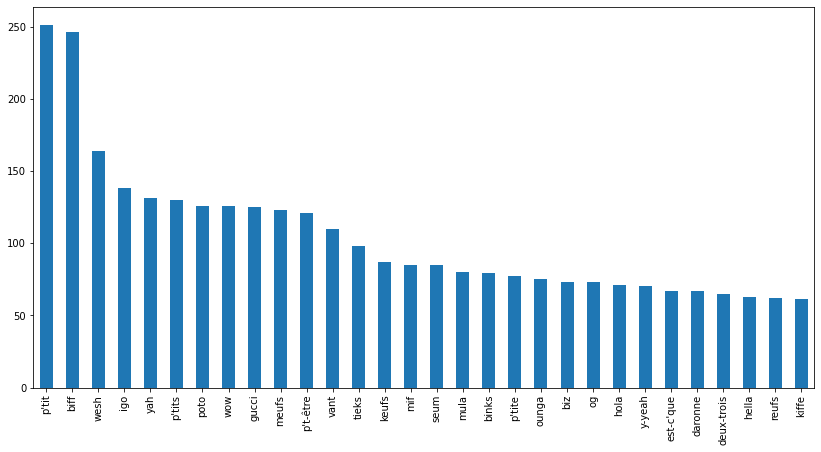

In [6]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

# Les anglicismes

In [7]:
english_words = description[description["is_french"] == False]
english_words = english_words[english_words["is_english"] == True]

frequency = pd.Series(english_words["count"], index=english_words.index)

with open("./datas/english_words.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

english_words

,count,is_french,is_english
yeah,1556,False,True
hey,1002,False,True
fuck,428,False,True
up,285,False,True
the,268,False,True
...,...,...,...
remate,1,False,True
state,1,False,True
words,1,False,True
munches,1,False,True


## WordCloud, plus le mot est grand, plus il est utilisé

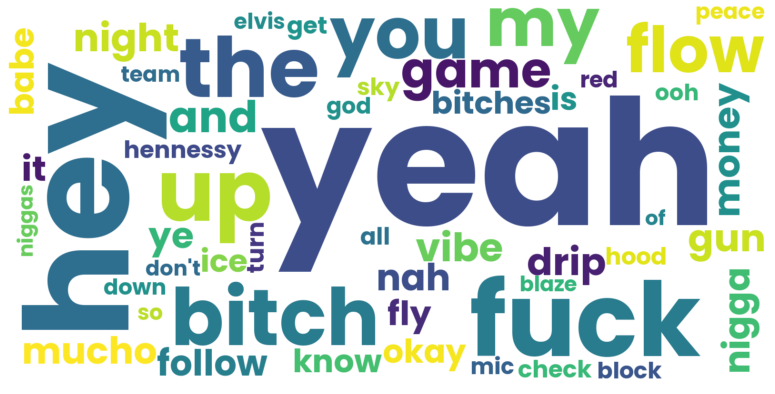

In [8]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

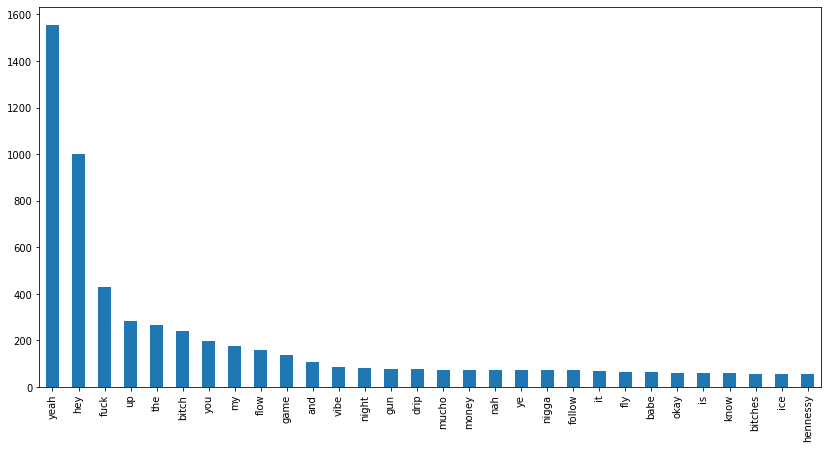

In [9]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

# Français de france !

In [10]:
french_words = description[description["is_french"] == True]

frequency = pd.Series(french_words["count"], index=french_words.index)

french_words

,count,is_french,is_english
la,16560,True,True
les,11280,True,True
pas,11012,True,True
le,11012,True,True
de,10847,True,True
...,...,...,...
ports,1,True,True
suçant,1,True,False
féliciter,1,True,False
tireurs,1,True,False


## WordCloud, plus le mot est grand, plus il est utilisé

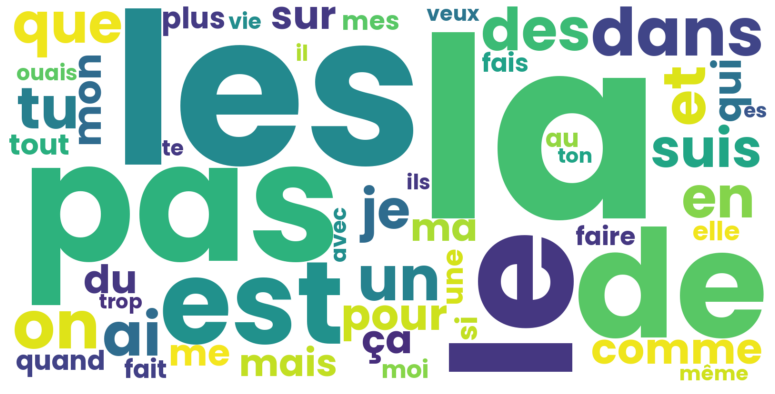

In [11]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogramme

<AxesSubplot:>

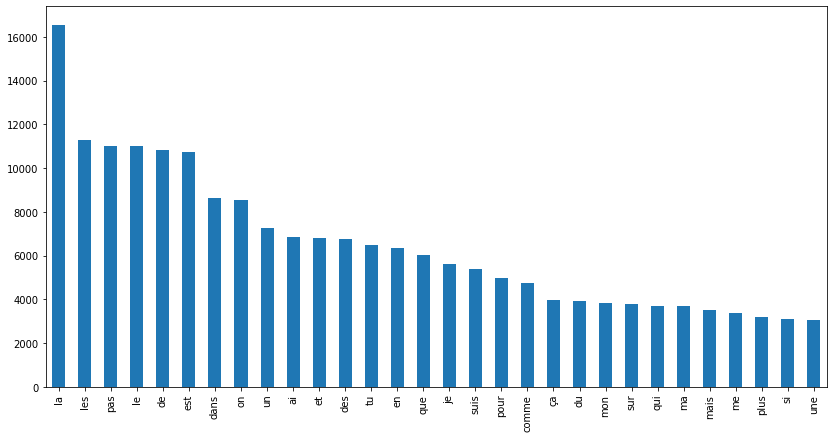

In [12]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

## Histogramme des mots

<AxesSubplot:>

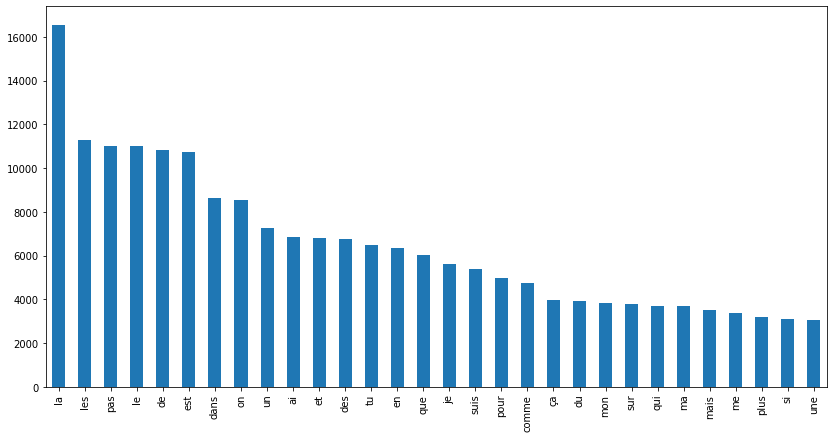

In [13]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

## Language

([<matplotlib.patches.Wedge at 0x1c231778af0>,
 [Text(-0.6401968363575246, 0.8945099276798536, 'French'),
  Text(-0.11489365199287904, -1.0939832945396102, 'English'),
  Text(0.8227494399609057, -0.7301255775851276, 'Other (slang)')],
 [Text(-0.34919827437683154, 0.4879145060071928, ' 69.8%'),
  Text(-0.06266926472338856, -0.5967181606579691, ' 7.1%'),
  Text(0.44877242179685756, -0.3982503150464332, ' 23.1%')])

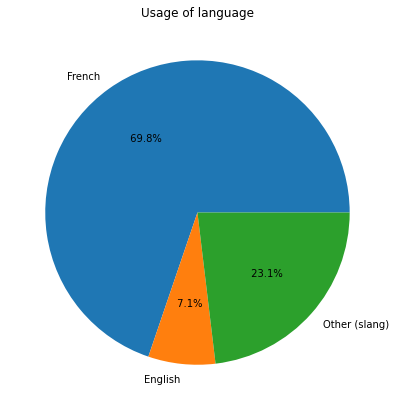

In [14]:
# Count number of words by language
french_words_count = len(description[description["is_french"] == True])
english_words_count = len(english_words)
other_words_count = len(not_french)

datas = [french_words_count, english_words_count, other_words_count]
labels = ["French", "English", "Other (slang)"]

plt.figure(figsize=(14, 7))
plt.title("Usage of language")

plt.pie(datas, labels=labels, autopct='% 1.1f%%')